Se prepara el entorno, descargando en primer lugar la red neuronal convolucional YOLOv5

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -qr yolov5/requirements.txt  # install dependencies (ignore errors)
%cd yolov5

import torch
from IPython.display import Image, clear_output  # to display images
from utils.google_utils import gdrive_download   # to download models/datasets

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.8.1+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


Se cargan las librerias adicionales necesarias

In [2]:
import glob
import csv
import cv2

from os import remove
from time import time
from IPython.display import Image, display
from argparse import ArgumentParser

Se deja preparada la red de Regresion y la YOLOv5 cargando las configuraciones de ambas, incluyendo en la carpeta de la red YOLO los archivos modificados


In [3]:
%cp /arch_mod/Resultados_CSV.csv /content/yolov5

In [4]:
# Se copia el peso del drive al colab
%cp /arch_mod/best.pt /content/yolov5

In [5]:
# Se cargan mis archivos modificados del YOLO
remove("/content/yolov5/detect.py")
remove("/content/yolov5/utils/plots.py")

In [6]:
%cp /arch_mod/detect.py /content/yolov5
%cp /arch_mod/plots.py /content/yolov5/utils

Las imagenes o video que se quiera analizar se incluyen tambien en la carpeta de la red YOLO

In [7]:
# Se carga el elemento/s que se quiere analizar
%cp -r /arch_mod/img_test /content/yolov5

In [8]:
%cd /content/yolov5/

/content/yolov5


Comando para ejecutar el programa con un video como entrada

In [ ]:
# Se ejecuta la red con un video
!python detect.py --weights best.pt --conf 0.4 --source TestR1.mp4

Comando para ejecutar el programa con imagenes como entrada

In [11]:
# Se ejecuta la red solo con imagenes
!python detect.py --weights best.pt --img 416 --conf 0.4 --source img_test/ --save-txt

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=416, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=True, source='img_test/', update=False, view_img=False, weights=['best.pt'])
YOLOv5 🚀 v5.0-39-g1849916 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 232 layers, 7251912 parameters, 0 gradients
image 1/11 /content/yolov5/img_test/valid_1.jpg: 416x416 7 cars, 2 crosswalks, 2 persons, Done. (0.009s)
image 2/11 /content/yolov5/img_test/valid_16.jpg: 416x416 4 cars, Done. (0.009s)
image 3/11 /content/yolov5/img_test/valid_2.jpg: 416x416 7 cars, 1 person, Done. (0.009s)
image 4/11 /content/yolov5/img_test/valid_21.jpg: 416x416 2 cars, Done. (0.009s)
image 5/11 /content/yolov5/img_test/valid_26.jpg: 416x416 3 cars, 5 persons, Done. (0.009s)
image 6/11 /content/yolov5/img_test/valid_27.jpg: 416x416 2 cars, 5 persons, Done. (0.009s)
image 7/11 /content/yolov5/img_test/v

Pasa por pantalla todas las imagenes una vez han sido procesadas por la red

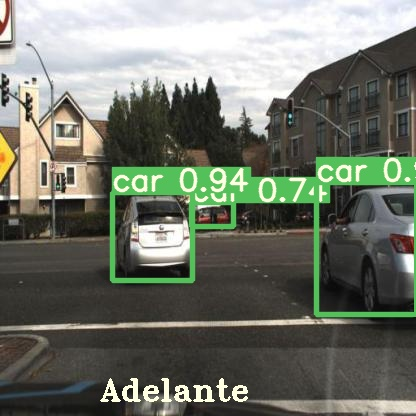

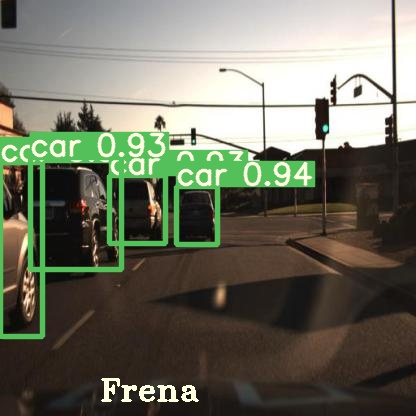

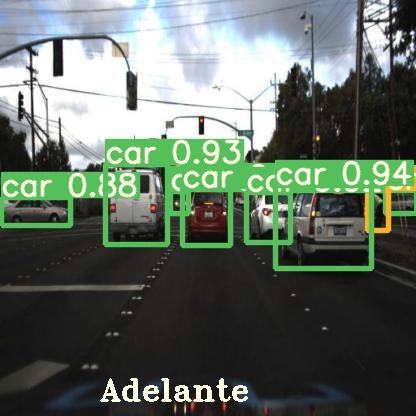

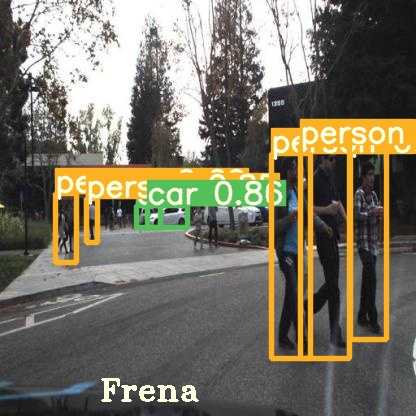

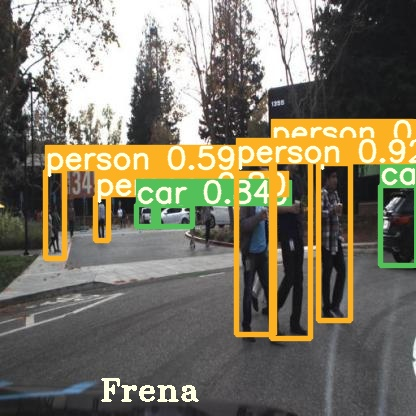

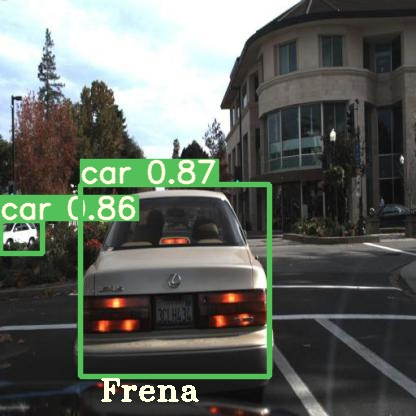

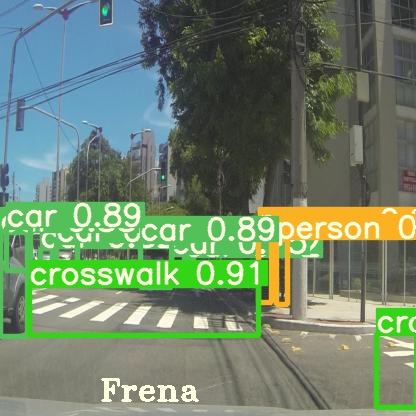

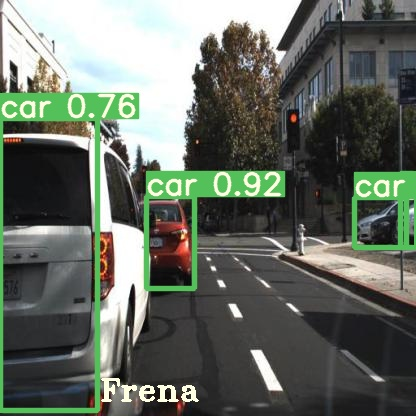

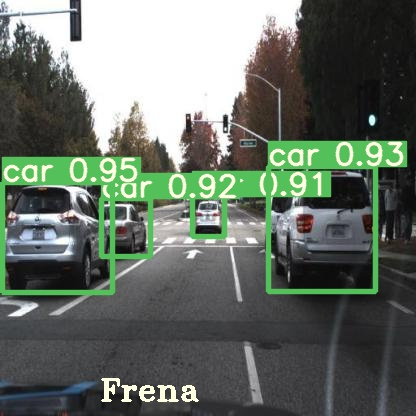

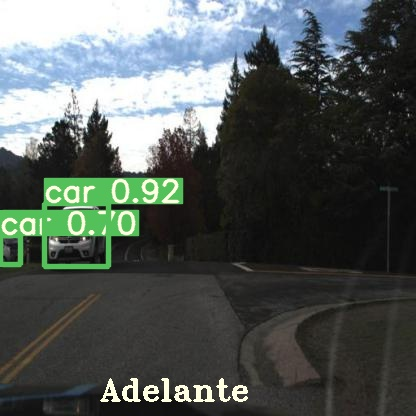

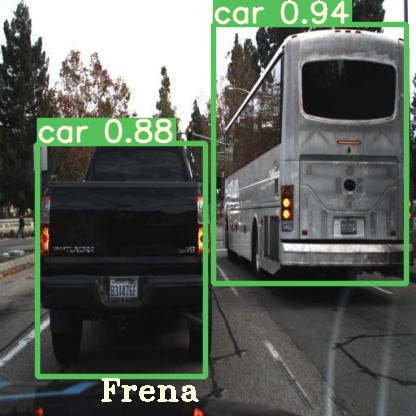

In [12]:
for imageName in glob.glob('/content/yolov5/runs/detect/exp2/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

En caso de analizar un video, con esta funcion se calculan los fotogramas por segundo que logra la red 

In [ ]:
# Esta función cuenta los cuadros en un video básicamente contándolos manualmente.
def count_frames_manually(video):
    frame_count = 0

    # Iteraremos sobre cada "frame" en el video, incrementando el conteo.
    while True:
        frame_was_read, _ = video.read()

        # Dejamos de iterar cuando ya no haya más cuadros en el video.
        if not frame_was_read:
            return frame_count

        frame_count += 1

video = cv2.VideoCapture('/content/yolov5/v_Test1R.mp4')

total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

total_frames2 = count_frames_manually(video)

print(f'Número de cuadros en el video: {total_frames}')
print(f'Número de cuadros en el video: {total_frames2}')

if total_frames == total_frames2:
  frames_FN = total_frames
else:
  print("Los frames de ambas medidas no coinciden")



Número de cuadros en el video: 0
Número de cuadros en el video: 0


Tiempo por frame y FPS

In [ ]:
# Para medir tiempo de ejecucio del programa y FPS
start_time = time()
!python detect.py --weights best.pt --img 416 --conf 0.4 --source  v_Test3R.mp4
end_time = time() 


In [ ]:
print("Total time = "+str(end_time - start_time)+ "\nTimer per Frame = "+str((end_time-start_time)/frames_FN))

Total time = 426.9577376842499
Timer per Frame = 0.16736877212240292


In [ ]:
# FPS
print("FPS = "+str(frames_FN/(end_time-start_time)))

FPS = 5.974830234571257


Que GPU se esta usando

In [ ]:
!nvidia-smi

Mon Apr 26 07:49:12 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8    10W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------